# Exercise

Problem description: https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant
- Data is provided in two formats - xlsx and ods. Use pd.read_excel to load the data .xlsx file. The excel file has 5 sheets. Create a dataframe for each and concatenate them into a single dataframe. [Hint: use pd.concat function]. Note: one column need to renamed: PE => EP to be consistent with the problem statement.
- Create training and test set with 70/30 ratio and random seed = 1. Predict EP based on the other variables as features (AT, RH, V and AP). 
- Calculate R2 and RMSE for training and test data. [Answer: 0.9287, 0.9284 (r2) 4.55 4.57 (rmse)]
- Find the residuals (ypredict - ytrue) on the test data and plot histogram to see its distribution. Ideally the histogram of the residuals should look "gaussian normal". Do a scatter plot for residual vs actual. Observe whether the residuals are consistently same for entire range of actual. 
- Which features are positively related with the outcome and which are negatively related?
- Which feature is the strongest predictor?
- Improve your model using log transformation of the output and polynomial transformation of the features with degree = 2 [Answer: 0.9371, 0.9369]. Also, plot the residual on the test data.


In [19]:
import pandas as pd
from sklearn import *
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
sheets = []
for i in range(5):
    sheets.append(pd.read_excel("/Users/abasar/Downloads/CCPP/Folds5x2_pp.xlsx"
                                , sheet_name=i))

In [10]:
sheets[0].shape

(9568, 5)

In [12]:
df = pd.concat(sheets)
df.shape

(47840, 5)

In [13]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [18]:
target = "PE"
X = df.drop(columns=target)

y = df[target]

X_dummy = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy, y
                                            , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.SGDRegressor(max_iter = 5000, tol=1e-4, eta0=1e-3
                               , learning_rate="invscaling"))
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

rmse_training = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

r2_training = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

print("rmse_training: ", rmse_training)
print("rmse_test", rmse_test)
print("r2_training: ", r2_training)
print("r2_test", r2_test)

rmse_training:  4.552090990963176
rmse_test 4.569199883145883
r2_training:  0.9287946029600895
r2_test 0.9284466498538154


Text(0.5, 1.0, 'Residual plot')

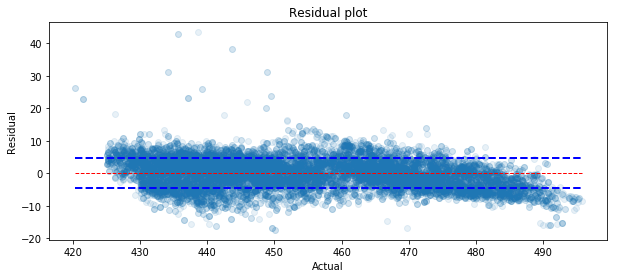

In [24]:
residuals_test = y_test_pred - y_test

plt.figure(figsize=(10, 4))
plt.scatter(y_test, residuals_test, alpha = 0.1)
plt.hlines(0, np.min(y_test), np.max(y_test), linestyle = "--", color = "red", linewidth = 1)
residual_std = np.std(residuals_test)
plt.hlines([residual_std, -residual_std], np.min(y_test), np.max(y_test)
                   , linestyle = "--", color = "blue", linewidth = 2)


plt.xlabel("Actual")
plt.ylabel("Residual")
plt.title("Residual plot")

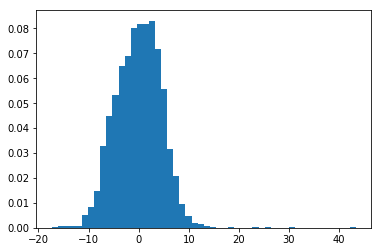

In [27]:
plt.hist(residuals_test, bins = 50, density=True);

rmse_training:  0.010199328029678732
rmse_test 0.010242939540605896
r2_training:  0.9254871738880676
r2_test 0.9250968425234879


Text(0.5, 1.0, 'Residual plot')

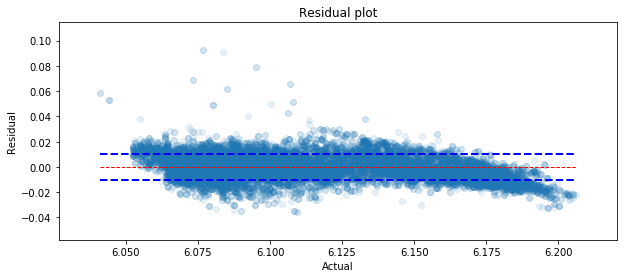

In [35]:
target = "PE"
X = df.drop(columns=target)

#y = df[target]
y = np.log(df[target])

X_dummy = pd.get_dummies(X, drop_first=True)
features = X_dummy.columns

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy, y
                                            , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.SGDRegressor(max_iter = 5000, tol=1e-4, eta0=1e-3
                               , learning_rate="invscaling"))
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

rmse_training = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

r2_training = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

print("rmse_training: ", rmse_training)
print("rmse_test", rmse_test)
print("r2_training: ", r2_training)
print("r2_test", r2_test)

residuals_test = y_test_pred - y_test

plt.figure(figsize=(10, 4))
plt.scatter(y_test, residuals_test, alpha = 0.1)
plt.hlines(0, np.min(y_test), np.max(y_test), linestyle = "--", color = "red", linewidth = 1)
residual_std = np.std(residuals_test)
plt.hlines([residual_std, -residual_std], np.min(y_test), np.max(y_test)
                   , linestyle = "--", color = "blue", linewidth = 2)


plt.xlabel("Actual")
plt.ylabel("Residual")
plt.title("Residual plot")

In [33]:
est = pipe.steps[-1][-1]

In [36]:
pd.DataFrame({"feature": features, "coefficient": est.coef_})

,feature,coefficient
0,AT,-0.027084
1,V,-0.010367
2,AP,0.001857
3,RH,-0.003404


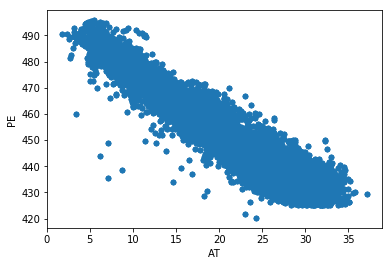

In [38]:
df.plot.scatter("AT", "PE")

In [39]:
import seaborn as sns

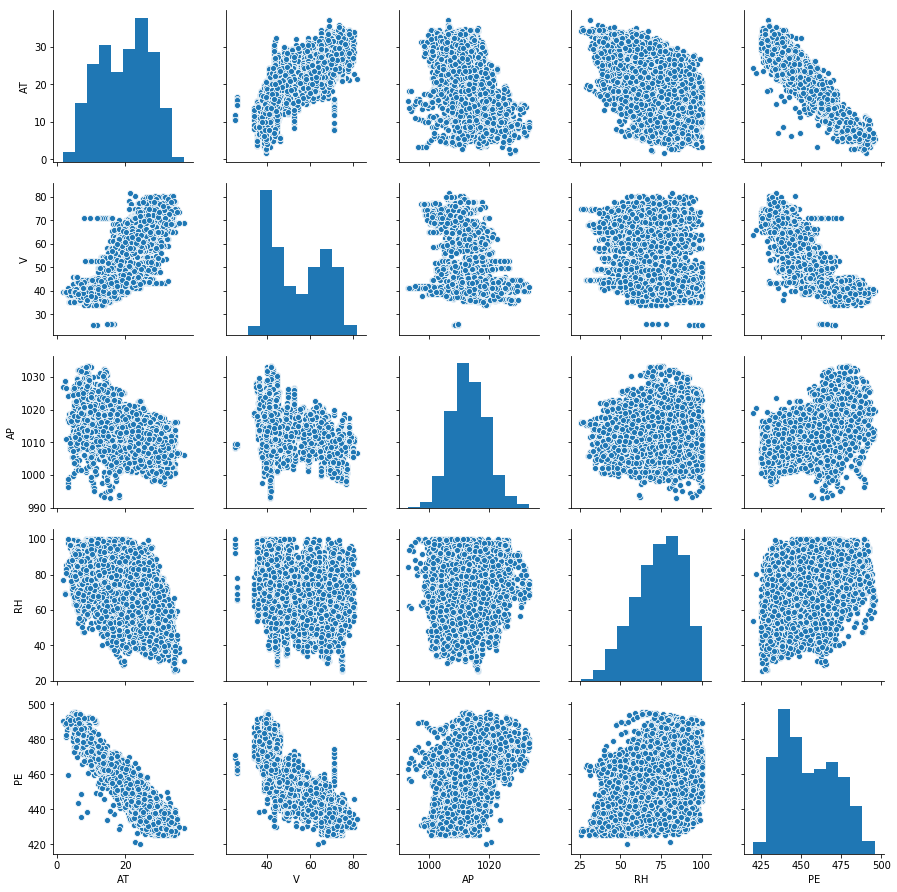

In [40]:
sns.pairplot(df)